In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Pre-Processing

In [3]:
df = pd.read_csv("./data/creditcard.csv")
df["Class"] = pd.Categorical(df["Class"])
df.shape

(284807, 31)

## Visualization (EDA)

Dataset contains 30 features. Apart from 'Time' and 'Amount', other 28 features are results of PCA. Hence correlation is nearly 0.

Text(0.5, 1.0, 'Correlation Heatmap')

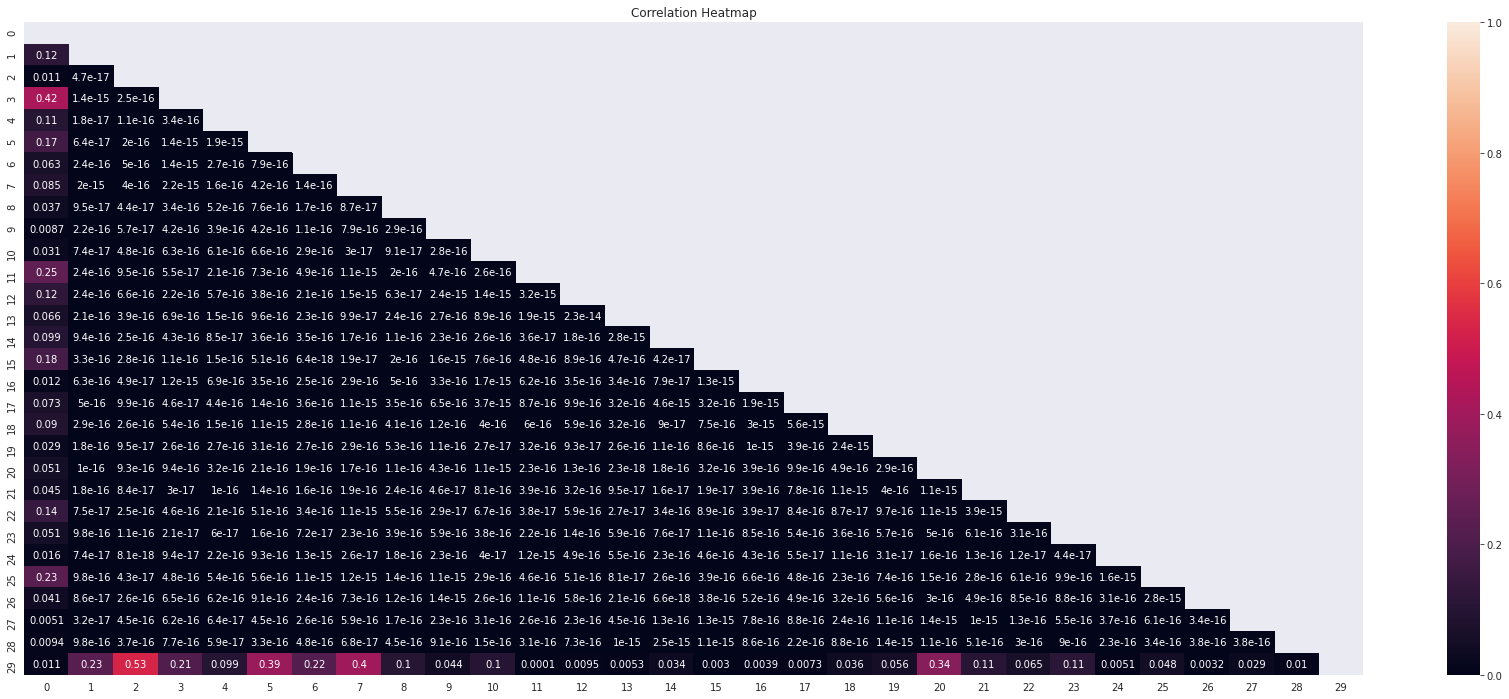

In [4]:
plt.figure(figsize=(30, 12))
sns.heatmap(np.tril(abs(df.corr())), vmin=0, vmax=1, mask=np.triu(df.corr()), annot=True).set_title("Correlation Heatmap")

When we investigate the mean values for features that belong to either 'Legitimate' or 'Fradulent' cases, for some reason, mean values for 'Legitimate' cases are very low compared to 'Fradulent' cases.

In [5]:
df[df["Class"] == 0].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [6]:
df[df["Class"] == 1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000


The dataset is extremely imbalanced (1 to ~587). But this is expected for a fraud detection training. Fradulent cases will be extremely imbalanced in real life data as well.

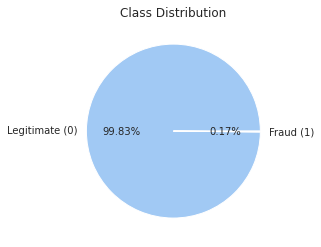

0    284315
1       492
Name: Class, dtype: int64

Baseline AUPRC Score: 0.0017304750013189597


In [7]:
counts = [df[df["Class"] == 0].shape[0], df[df["Class"] == 1].shape[0]]
labels = ["Legitimate (0)", "Fraud (1)"]

plt.pie(counts, labels=labels, colors = sns.color_palette('pastel')[:len(counts)], autopct="%.2f%%")
plt.title("Class Distribution")
plt.show()

print(df["Class"].value_counts())

print("\nBaseline AUPRC Score: {}".format(counts[1] / counts[0]))

There is a very interesting result showing in the barplots. It looks like 'Legitimate' cases' means are (-1)/'Fradulent' means. Of course this is a wild interpretation.<br>
But one thing for sure is ('Legitimate' means) * ('Fraudulent' means) < 0.

Text(0.5, 1.0, 'Fradulent')

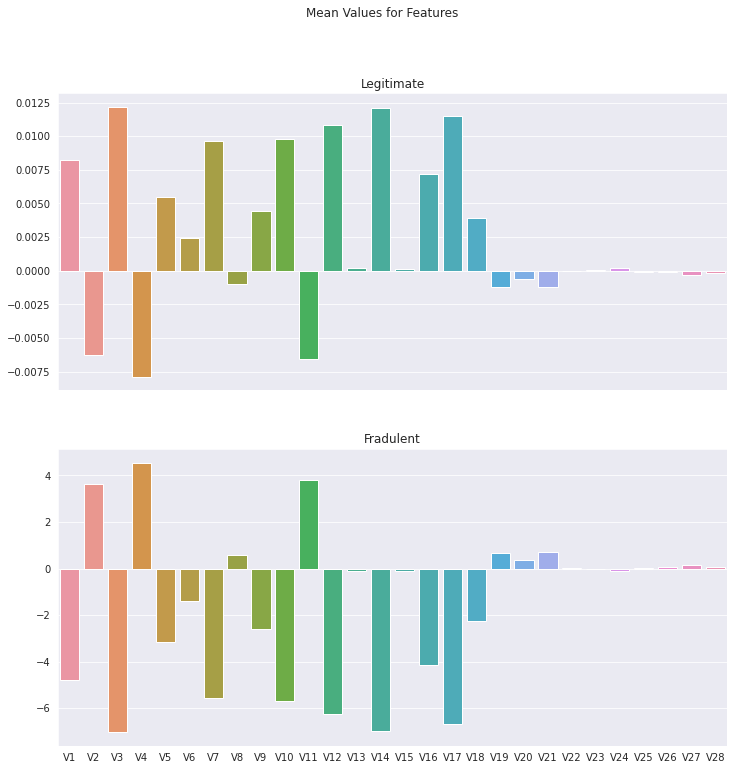

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
fig.suptitle("Mean Values for Features")

sns.barplot(x=np.mean(df[df["Class"] == 0].iloc[:, 1:-2]).index, y=np.mean(df[df["Class"] == 0].iloc[:, 1:-2]).values, ax=axes[0]).set_title("Legitimate")
sns.barplot(x=np.mean(df[df["Class"] == 1].iloc[:, 1:-2]).index, y=np.mean(df[df["Class"] == 1].iloc[:, 1:-2]).values, ax=axes[1]).set_title("Fradulent")

Looking at the results below, I expected to see -1's all around. Since this is not the case, my insight from before is proven false.

In [9]:
np.mean(df[df["Class"] == 0].iloc[:, 1:-2]) * np.mean(df[df["Class"] == 1].iloc[:, 1:-2])

V1    -3.940550e-02
V2    -2.272420e-02
V3    -8.560148e-02
V4    -3.569975e-02
V5    -1.718399e-02
V6    -3.380773e-03
V7    -5.366336e-02
V8    -5.634865e-04
V9    -1.152876e-02
V10   -5.576802e-02
V11   -2.499033e-02
V12   -6.780001e-02
V13   -2.068590e-05
V14   -8.410960e-02
V15   -1.494395e-05
V16   -2.965887e-02
V17   -7.689084e-02
V18   -8.731804e-03
V19   -8.017240e-04
V20   -2.398814e-04
V21   -8.811723e-04
V22   -3.415457e-07
V23   -2.811558e-06
V24   -1.912587e-05
V25   -2.972974e-06
V26   -4.616092e-06
V27   -5.034948e-05
V28   -9.907902e-06
dtype: float64

## Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df["Class"], test_size=0.2, stratify=df["Class"], random_state=42)

X_train_legitimate_count = y_train.value_counts()[0]
X_train_fraudulent_count = y_train.value_counts()[1]

## Undersampling

To battle class imbalance, it is possible to apply undersampling methods to remove samples from the majority class.<br>
I will use imblearn which is compatible with scikit-learn and is part of scikit-learn-contrib projects.<br>
I will train the models on undersampled data then make prediction on standard X_train. If I were to test the model on undersampled data as well the whole point of undersampling would be void. At the end of the day, goal is trying to build a model that can predict X_test.<br>

### Random Undersampling

Randomly select n rows from the majority class where n is the number of minority rows.

In [11]:
undersampled_df = df[df["Class"] == 1]
undersampled_df = undersampled_df.append(((df.sample(frac=1).reset_index(drop=True))[df["Class"] == 0]).iloc[:undersampled_df.shape[0],:], ignore_index=True)

print("Undersampled DataFrame has {} legitimate cases, {} fraudulent cases.".format(undersampled_df["Class"].value_counts()[0], undersampled_df["Class"].value_counts()[1]))

undersampled_X_train, undersampled_X_test, undersampled_y_train, undersampled_y_test = train_test_split(undersampled_df.iloc[:, :-1], undersampled_df["Class"], test_size=0.2, stratify=undersampled_df["Class"], random_state=42)

Undersampled DataFrame has 493 legitimate cases, 491 fraudulent cases.


### NearMiss

Majority class examples with minimum distance to each minority class example.<br>

In [12]:
from imblearn.under_sampling import NearMiss

undersampler = NearMiss(version=1, n_neighbors=3)
nearmiss_X, nearmiss_y = undersampler.fit_resample(df.iloc[:, :-1], df["Class"])

nearmiss_X_train, nearmiss_X_test, nearmiss_y_train, nearmiss_y_test = train_test_split(nearmiss_X, nearmiss_y, test_size=0.2, stratify=nearmiss_y, random_state=42)

## Oversampling

### SMOTE

In [13]:
from imblearn.over_sampling import SMOTE
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

y_train_smote.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

## Discretization

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

There are multiple ways to decide on the n_bins for discretization. Below are the 3 most used ones.
<ol>
<li> Square-root choice: n_bins = ceiling(square_root(n_rows)) </li>
<li> Sturges' Formula: n_bins = ceiling(log<sub>2</sub>(n_rows)) + 1
<li> Freedman-Diaconis' choice: bin_height = (2 * IQR) / cube_root(n_rows)
</ol>

First and Second methods have the same number of bins for every column. Third method has different number of bins for every column depending on interquartile range.

In [15]:
n_rows = df.shape[0]

squareroot_choice = len(np.histogram_bin_edges(df["Amount"], bins="sqrt")) - 1 # number of bins = number of edges - 1

sturges = len(np.histogram_bin_edges(df["Amount"], bins="sturges")) - 1 # number of bins = number of edges - 1

freedmandiaconis_choice = []
for column in df.columns[:-1]:
    edges = np.histogram_bin_edges(df[column], bins="fd")
    freedmandiaconis_choice.append(len(edges) - 1)
    

print("Square-root choice: {}\nSturges' Formula: {}".format(squareroot_choice, sturges))
print("Freedman-Diaconis' choice:")
for i, j in zip(df.columns[:-1], freedmandiaconis_choice):
    print("\tColumn: {} -> n_bins: {}".format(i, j))

Square-root choice: 534
Sturges' Formula: 20
Freedman-Diaconis' choice:
	Column: Time -> n_bins: 67
	Column: V1 -> n_bins: 866
	Column: V2 -> n_bins: 2224
	Column: V3 -> n_bins: 991
	Column: V4 -> n_bins: 467
	Column: V5 -> n_bins: 3749
	Column: V6 -> n_bins: 2805
	Column: V7 -> n_bins: 4802
	Column: V8 -> n_bins: 5722
	Column: V9 -> n_bins: 770
	Column: V10 -> n_bins: 1608
	Column: V11 -> n_bins: 369
	Column: V12 -> n_bins: 853
	Column: V13 -> n_bins: 325
	Column: V14 -> n_bins: 1065
	Column: V15 -> n_bins: 358
	Column: V16 -> n_bins: 1044
	Column: V17 -> n_bins: 1282
	Column: V18 -> n_bins: 479
	Column: V19 -> n_bins: 461
	Column: V20 -> n_bins: 8962
	Column: V21 -> n_bins: 4921
	Column: V22 -> n_bins: 659
	Column: V23 -> n_bins: 7158
	Column: V24 -> n_bins: 308
	Column: V25 -> n_bins: 878
	Column: V26 -> n_bins: 355
	Column: V27 -> n_bins: 11010
	Column: V28 -> n_bins: 12353
	Column: Amount -> n_bins: 11810


#### Square-root Choice

In [16]:
discretizer = KBinsDiscretizer(n_bins=squareroot_choice, encode="ordinal", strategy="uniform")
sqrt_binned_df = pd.DataFrame(discretizer.fit_transform(df.iloc[:,:-1]), columns=df.columns[:-1])
sqrt_binned_df["Class"] = df["Class"]

for column in sqrt_binned_df.columns:
    sqrt_binned_df[column] = sqrt_binned_df[column].astype("category")

sqrt_binned_X_train, sqrt_binned_X_test, sqrt_binned_y_train, sqrt_binned_y_test = train_test_split(sqrt_binned_df.iloc[:, :-1], sqrt_binned_df["Class"], test_size=0.2, stratify=sqrt_binned_df["Class"], random_state=42)

sqrt_binned_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,499.0,409.0,470.0,167.0,407.0,142.0,142.0,419.0,253.0,...,299.0,279.0,354.0,208.0,312.0,210.0,223.0,166.0,3.0,0
1,0.0,522.0,411.0,448.0,145.0,409.0,140.0,141.0,419.0,242.0,...,297.0,256.0,356.0,179.0,313.0,238.0,222.0,167.0,0.0,0
2,0.0,499.0,402.0,463.0,143.0,407.0,150.0,144.0,420.0,219.0,...,301.0,291.0,362.0,154.0,298.0,215.0,221.0,166.0,7.0,0


#### Sturges' Choice

In [17]:
discretizer = KBinsDiscretizer(n_bins=sturges, encode="ordinal", strategy="uniform")
sturges_binned_df = pd.DataFrame(discretizer.fit_transform(df.iloc[:,:-1]), columns=df.columns[:-1])
sturges_binned_df["Class"] = df["Class"]

for column in sturges_binned_df.columns:
    sturges_binned_df[column] = sturges_binned_df[column].astype("category")

sturges_binned_X_train, sturges_binned_X_test, sturges_binned_y_train, sturges_binned_y_test = train_test_split(sturges_binned_df.iloc[:, :-1], sturges_binned_df["Class"], test_size=0.2, stratify=sturges_binned_df["Class"], random_state=42)

sturges_binned_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,18.0,15.0,17.0,6.0,15.0,5.0,5.0,15.0,9.0,...,11.0,10.0,13.0,7.0,11.0,7.0,8.0,6.0,0.0,0
1,0.0,19.0,15.0,16.0,5.0,15.0,5.0,5.0,15.0,9.0,...,11.0,9.0,13.0,6.0,11.0,8.0,8.0,6.0,0.0,0
2,0.0,18.0,15.0,17.0,5.0,15.0,5.0,5.0,15.0,8.0,...,11.0,10.0,13.0,5.0,11.0,8.0,8.0,6.0,0.0,0


#### Freedman-Diaconis' Choice

In [18]:
discretizer = KBinsDiscretizer(n_bins=freedmandiaconis_choice, encode="ordinal", strategy="uniform")
fd_binned_df = pd.DataFrame(discretizer.fit_transform(df.iloc[:,:-1]), columns=df.columns[:-1])
fd_binned_df["Class"] = df["Class"]

for column in fd_binned_df.columns:
    fd_binned_df[column] = fd_binned_df[column].astype("category")

fd_binned_X_train, fd_binned_X_test, fd_binned_y_train, fd_binned_y_test = train_test_split(fd_binned_df.iloc[:, :-1], fd_binned_df["Class"], test_size=0.2, stratify=fd_binned_df["Class"], random_state=42)

fd_binned_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,809.0,1704.0,873.0,146.0,2862.0,750.0,1281.0,4500.0,365.0,...,2761.0,344.0,4751.0,120.0,513.0,140.0,4612.0,3862.0,68.0,0
1,0.0,847.0,1712.0,832.0,126.0,2872.0,735.0,1271.0,4499.0,349.0,...,2745.0,316.0,4773.0,103.0,515.0,158.0,4583.0,3871.0,1.0,0
2,0.0,809.0,1674.0,860.0,125.0,2857.0,788.0,1297.0,4509.0,316.0,...,2782.0,359.0,4859.0,89.0,491.0,142.0,4574.0,3853.0,174.0,0


# Modeling

Since the data is extremely imbalanced, accuracy is not a good indicator of model performance. AUPRC score is used for imbalanced datasets. Since baseline AUPRC is 0.0017, getting a 0.88 score is incredible.

In [19]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay

## XGBoost

XGBoost is a state-of-the-art classification/regression model that can be tuned for a wide array of actions.<br>
For the current version of XGBoost, categorical features are only supported with GPU training. Since WSL2 does not support GPU training yet, I have only tested undersampling which lowered the score.<br>

In [20]:
from xgboost import XGBClassifier

booster="gbtree" has the higher accuracy compared to "gblinear" as it uses linear functions.<br>
tree_method="hist" is 10 times faster than "auto" method.<br>
objective="binary:logistic" for binary classification.<br>
eval_metric="aucpr" because of extreme class imbalance.<br>
seed=42 for tuning the model. (seed is random_state in scikit).<br>

### X_test

I am only interested in fraud detection performance as classifying a case as legitimate does not bring value. For frauds, the model was able to catch 84% of all fraud cases(recall). Out of its fraud guesses, 90% of them were correct(precision). 0.90 precision means we will not be bothering our customers with false claims. But 16% of fraudulent accounts slipped by the model. It has a AUPRC score of 0.88, which is more useful in this case to compare different models performance.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



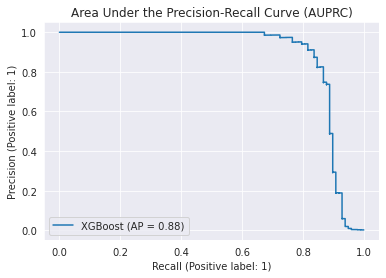

In [21]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="auc", scale_pos_weight=np.sqrt(X_train_legitimate_count/X_train_fraudulent_count)))
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Random Undersampling

With random sampling, the precision score is so low that the results are worthless.

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.98      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.97      0.53     56962
weighted avg       1.00      0.96      0.98     56962



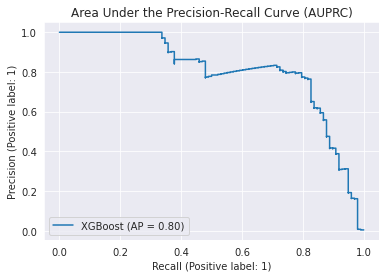

In [22]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="auc"))
xgb.fit(undersampled_X_train, undersampled_y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### NearMiss Undersampling

Once again precision is too low.

              precision    recall  f1-score   support

           0       1.00      0.53      0.69     56864
           1       0.00      0.99      0.01        98

    accuracy                           0.53     56962
   macro avg       0.50      0.76      0.35     56962
weighted avg       1.00      0.53      0.69     56962



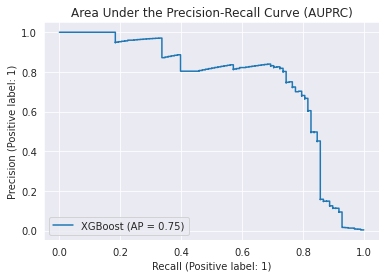

In [23]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="auc"))
xgb.fit(nearmiss_X_train, nearmiss_y_train)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### SMOTE

SMOTE is a widely used oversampling method that artifically increases positive cases for better classification. Results are slightly worse than X_test.<br>
eval_metric changes to "error" as the class is no longer imbalanced.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.85      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



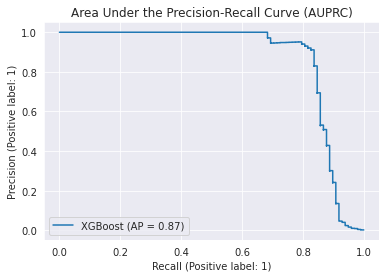

In [24]:
xgb = make_pipeline(StandardScaler(), XGBClassifier(booster="gbtree", tree_method="hist", objective="binary:logistic", seed=42, use_label_encoder=False, eval_metric="error"))
xgb.fit(X_train_smote, y_train_smote)

xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, xgb_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, xgb_proba, name="XGBoost").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

## Decision Tree

Decision Trees are frequently used in classification models as it is easier to understand/explain the models to stakeholders.<br>
It is known that decision trees generally struggle with continuous values. With the help of discretization I hope to improve the overall results.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer

max_depth=5 and min_samples_split=2 prevent overfitting.

### X_test

It has a precision of 0.91 and recall of 0.79. We are missing 21% of fraudulent cases and 9% of fraudulent classification were false. While these are not bad, it is lower than XGBoost's results, 0.13 less AUPRC than XGBoost.<br>


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



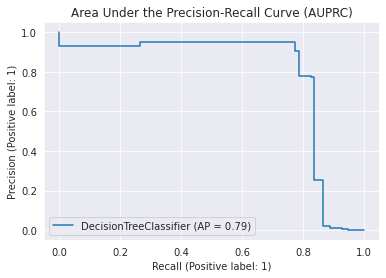

In [26]:
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None, criterion="entropy", random_state=42))
dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Square-root Choice

0.5 lower AUPRC score. So square-root choice for bin numbers is not good.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



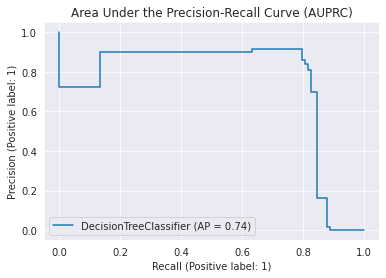

In [28]:
dtc = make_pipeline(DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None,criterion="entropy", random_state=42))
dtc.fit(sqrt_binned_X_train, sqrt_binned_y_train)

dtc_pred = dtc.predict(sqrt_binned_X_test)
dtc_proba = dtc.predict_proba(sqrt_binned_X_test)[:, 1]

print(classification_report(sqrt_binned_y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(sqrt_binned_y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Sturges' Formula

0.2 better AUPRC. So binning with respect to Sturges' Formula is actually better.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.80      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



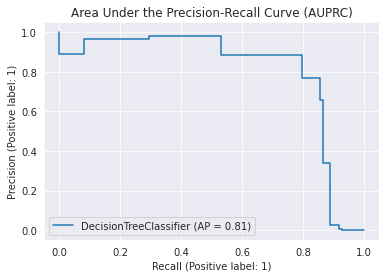

In [30]:
dtc = make_pipeline(DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None,criterion="entropy", random_state=42))
dtc.fit(sturges_binned_X_train, sturges_binned_y_train)

dtc_pred = dtc.predict(sturges_binned_X_test)
dtc_proba = dtc.predict_proba(sturges_binned_X_test)[:, 1]

print(classification_report(sturges_binned_y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(sturges_binned_y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Freedman-Diaconis' Choice

0.3 lower AUPRC score.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



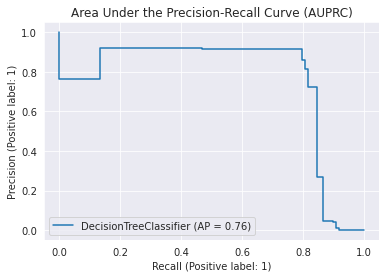

In [31]:
dtc = make_pipeline(DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None,criterion="entropy", random_state=42))
dtc.fit(fd_binned_X_train, fd_binned_y_train)

dtc_pred = dtc.predict(fd_binned_X_test)
dtc_proba = dtc.predict_proba(fd_binned_X_test)[:, 1]

print(classification_report(fd_binned_y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(fd_binned_y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### Random Undersampling

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56864
           1       0.02      0.94      0.04        98

    accuracy                           0.93     56962
   macro avg       0.51      0.93      0.50     56962
weighted avg       1.00      0.93      0.96     56962



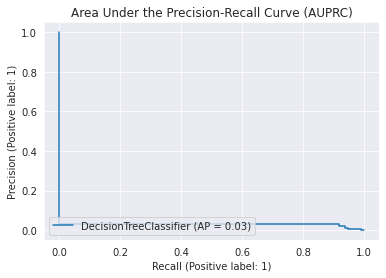

In [32]:
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None, criterion="entropy", random_state=42))
dtc.fit(undersampled_X_train, undersampled_y_train)

dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### NearMiss Undersampling

              precision    recall  f1-score   support

           0       1.00      0.56      0.72     56864
           1       0.00      0.94      0.01        98

    accuracy                           0.56     56962
   macro avg       0.50      0.75      0.36     56962
weighted avg       1.00      0.56      0.72     56962



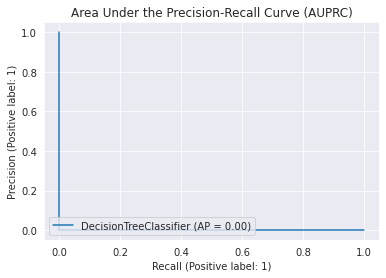

In [33]:
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None, criterion="entropy", random_state=42))
dtc.fit(nearmiss_X_train, nearmiss_y_train)

dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

### SMOTE

Better than undersampling but worse than default and discretization.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.88      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.93      0.59     56962
weighted avg       1.00      0.99      0.99     56962



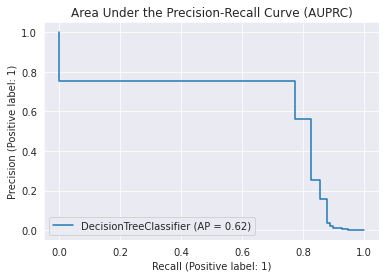

In [34]:
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5, min_samples_split=2, max_leaf_nodes=None, criterion="entropy", random_state=42))
dtc.fit(X_train_smote, y_train_smote)

dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)[:, 1]

print(classification_report(y_test, dtc_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, dtc_proba, name="DecisionTreeClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

## SGDClassifier with Kernel Approximation

scikit-learn docs suggeest using SGDClassifier for large datasets(>100000). It is faster than DecisionTree and XGBoost, but has lower AUPRC score.

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import PolynomialCountSketch

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.54      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



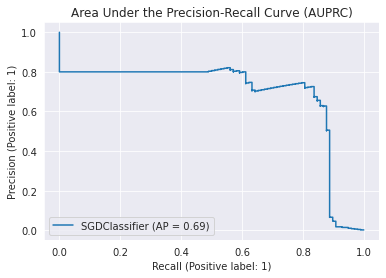

In [36]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(loss="log", random_state=42))
sgd.fit(X_train, y_train)

sgd_pred = sgd.predict(X_test)
sgd_proba = sgd.predict_proba(X_test)[:, 1]

print(classification_report(y_test, sgd_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, sgd_proba, name="SGDClassifier").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")

#### Kernel Approximation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.50      0.64        98

    accuracy                           1.00     56962
   macro avg       0.94      0.75      0.82     56962
weighted avg       1.00      1.00      1.00     56962



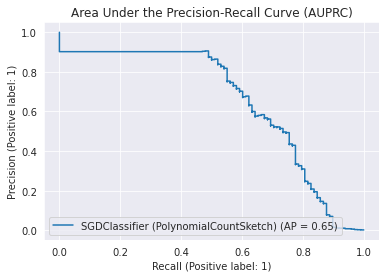

In [37]:
pcs_feature = PolynomialCountSketch(gamma=1.0, degree=2, n_components=100, random_state=42)
X_features = pd.DataFrame(pcs_feature.fit_transform(X_train))

sgd = make_pipeline(StandardScaler(), SGDClassifier(loss="log", random_state=42))
sgd.fit(X_features, y_train)

sgd_pred = sgd.predict(pd.DataFrame(pcs_feature.fit_transform(X_test)))
sgd_proba = sgd.predict_proba(pd.DataFrame(pcs_feature.fit_transform(X_test)))[:, 1]

print(classification_report(y_test, sgd_pred))
display = PrecisionRecallDisplay.from_predictions(y_test, sgd_proba, name="SGDClassifier (PolynomialCountSketch)").ax_.set_title("Area Under the Precision-Recall Curve (AUPRC)")